In [3]:
import sys
sys.version

'3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

### Problem definition 

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

In [5]:
"""
age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)"""

"\nage - age in years\nsex - (1 = male; 0 = female)\ncp - chest pain type\n0: Typical angina: chest pain related decrease blood supply to the heart\n1: Atypical angina: chest pain not related to heart\n2: Non-anginal pain: typically esophageal spasms (non heart related)\n3: Asymptomatic: chest pain not showing signs of disease\ntrestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern\nchol - serum cholestoral in mg/dl\nserum = LDL + HDL + .2 * triglycerides\nabove 200 is cause for concern\nfbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\n'>126' mg/dL signals diabetes\nrestecg - resting electrocardiographic results\n0: Nothing to note\n1: ST-T Wave abnormality\ncan range from mild symptoms to severe problems\nsignals non-normal heart beat\n2: Possible or definite left ventricular hypertrophy\nEnlarged heart's main pumping chamber\nthalach - maximum heart rate achieved\nexang - exercise induced angina (1

In [17]:
path = r"D:\Faisal\telegram\Machine_Learning\11. Milestone Project 1 Supervised Learning - Part 01\6.1 heart-disease.csv"
file = pd.read_csv(path)
df = file
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.shape

(303, 14)

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [15]:
# checking if there are any spaces in column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
f = []
for i in df.columns:
    f.append("self." + i)

f

['self.age',
 'self.sex',
 'self.cp',
 'self.trestbps',
 'self.chol',
 'self.fbs',
 'self.restecg',
 'self.thalach',
 'self.exang',
 'self.oldpeak',
 'self.slope',
 'self.ca',
 'self.thal',
 'self.target']

In [46]:
dfq = " ".join(f)
dfq
# for i in dfq:
#     print(i)

'self.age self.sex self.cp self.trestbps self.chol self.fbs self.restecg self.thalach self.exang self.oldpeak self.slope self.ca self.thal self.target'

In [32]:
df.dtypes # checking data types

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


# Experiment

In [18]:
X = df.drop("target",axis=1)
y = df["target"]

In [12]:
from sklearn.model_selection import train_test_split

**Spliting the data**

In [19]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Rough

In [19]:
c = np.c_[X_train,y_train]


In [25]:
X_train.shape

(242, 13)

In [26]:
c.shape

(242, 14)

In [30]:
ca = np.c_[X_train,np.array(y_train)]
ca.shape


(242, 14)

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
# from sklearn.metrics import Sta

categorical_features = []   # categorical_column_names
categorical_imputer = Pipeline(steps=[
        ("cat_imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot", (handle_unknown="ignore"))
        ])

numerical_features = [] # numerical columns which are missing values
numerical_imputer = Pipeline(steps=[
        ("numerical_imputer", SimpleImputer(strategy="median"))
    ])

preprocessor = ColumnTransformer(transformers=[
        ("categorical_imputer", categorical_imputer,categorical_features),
        ("numerical_imputer", numerical_imputer,numerical_features)
        ],remainder="passthrough")

tra = preprocessor.fit_transform(X_train)
tra


SyntaxError: invalid syntax (3149991471.py, line 10)

## Defining a function to get
* Accuracy
* Precision
* Recall
* F1 Score

In [83]:
def metrics(y_test,y_preds):

    accuracy = accuracy_score(y_test,y_preds)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)

    metrics_col = {
        "accuracy" : round(accuracy * 100),
        "precision" : round(precision * 100),
        "recall" : round(recall) * 100,
        "f1_score" : round(f1) * 100
    }

    return metrics_col



In [21]:
import numpy as np
gr =    {   
                    'penalty' : ['l2'],
                    'C' : np.logspace(-4, 4, 20),
                    'solver' : ['liblinear','saga'],
                    'max_iter' : np.arange(100,500,100)}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
a = GridSearchCV(LogisticRegression(),gr,cv=3)
a.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': array([100, 200, 300, 400]),
                         'penalty': ['l2'], 'solver': ['liblinear', 'saga']})

In [24]:
a.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [26]:
y_pr = a.predict(X_test)

In [28]:
a.score(X_test,y_test)

0.8852459016393442

In [26]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SVC" : SVC() 
}

## Selecting the best model

In [37]:
def model_selection(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    models_col = {}
    for name , model in models.items():
        # fittig a model 
        model.fit(X_train,y_train)
        # scoring 
        sc = model.score(X_test,y_test)
        models_col[name] = sc

    return models_col

m = model_selection(models,X_train,X_test,y_train,y_test)
m


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918,
 'SVC': 0.7049180327868853}

In [42]:
np.random.seed(42)
knn_scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scor = knn.score(X_test,y_test)
    knn_scores.append(scor)

max(knn_scores)

0.7213114754098361

**Since the score of KNN and SVC is low we will drop both the models** 

# RandomizedSearchCV

### LogisticRegression

In [45]:
logistic_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ["liblinear","saga"]
}

In [46]:
log_rs = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=logistic_grid,
                            cv=5,
                            n_iter=10,
                            verbose=True)

log_rs.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga']},
                   verbose=True)

In [47]:
log_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
log_rs.score(X_test,y_test)

0.8852459016393442

In [52]:
y_preds = log_rs.predict(X_test)

In [53]:
log_metrics = metrics(y_test,y_preds)
log_metrics

{'accuracy': 0.8852459016393442,
 'precision': 0.8787878787878788,
 'recall': 0.90625,
 'f1_score': 0.8923076923076922}

# RandomizedSearchCV
* If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.
### RandomForestClassifier

In [56]:
rf_grid = {
    "n_estimators" : np.arange(100,1000,200),
    "max_depth" : [None],
    "min_samples_split" : np.arange(1,10,2),
    "min_samples_leaf":np.arange(1,5,1)
}

In [57]:
rf_rs = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

rf_rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([1, 3, 5, 7, 9]),
                                        'n_estimators': array([100, 300, 500, 700, 900])},
                   verbose=True)

In [61]:
rf_rs.best_params_

{'n_estimators': 700,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_depth': None}

In [58]:
rf_rs.score(X_test,y_test)

0.8688524590163934

In [59]:
rf_preds = rf_rs.predict(X_test)

In [60]:
rf_metrics = metrics(y_test,rf_preds)
rf_metrics

{'accuracy': 0.8688524590163934,
 'precision': 0.8529411764705882,
 'recall': 0.90625,
 'f1_score': 0.8787878787878787}

In [62]:
rf_rs.best_params_

{'n_estimators': 700,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_depth': None}

# GridSearchCV 
* Exhaustive search over specified parameter values for an estimator.
### RandomForestClassifier

In [63]:
rf_gr_grid = {
    "n_estimators" : np.arange(600,900,100),
    "max_depth" : [None,1,2],
    "min_samples_split" : np.arange(6,9,1),
    "min_samples_leaf":np.arange(3,6,1)
}

In [64]:
rf_grid = GridSearchCV(RandomForestClassifier(),
                       param_grid=rf_gr_grid,
                       cv=5,
                       verbose=True)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2],
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([6, 7, 8]),
                         'n_estimators': array([600, 700, 800])},
             verbose=True)

In [65]:
rf_grid.best_params_

{'max_depth': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 600}

In [66]:
rf_grid.score(X_test,y_test)

0.8688524590163934

In [67]:
rf_grid_preds = rf_grid.predict(X_test)
rf_grid_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [137]:
rf_grid_metrics = metrics(y_test,rf_grid_preds)
rf_grid_metrics

{'accuracy': 87, 'precision': 85, 'recall': 100, 'f1_score': 100}

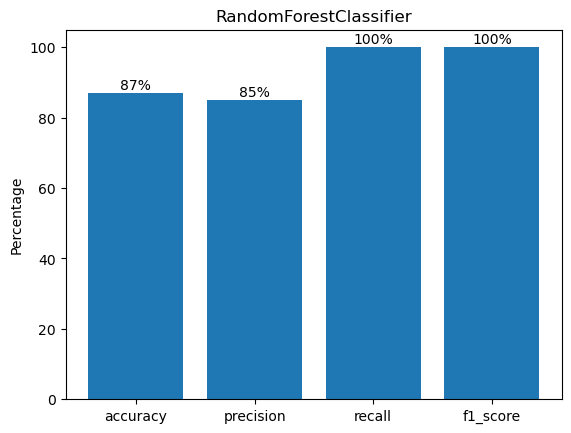

In [144]:
fig, ax = plt.subplots()
ax.bar(rf_grid_metrics.keys(),rf_grid_metrics.values())
vals = []
[vals.append(i) for i in rf_grid_metrics.values()]

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 1
    ax.annotate(f"{vals[i]}%", (x,y), ha='center')
    ax.set(title="RandomForestClassifier",ylabel="Percentage")

# GridSearchCV
* Setting-up the parameters based on RandomizedSearchCV
### LogisticRegression

In [70]:
log_rs.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [71]:
log_grid_2 = {'C': np.logspace(-2,2,20),
              "solver": ["liblinear"]}

In [72]:
np.random.seed(42)
log_grid_model = GridSearchCV(LogisticRegression(),
                              param_grid=log_grid_2,
                              cv=5,
                              verbose = True)

log_grid_model.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                         'solver': ['liblinear']},
             verbose=True)

In [73]:
log_grid_model.best_params_

{'C': 0.18329807108324356, 'solver': 'liblinear'}

In [74]:
log_grid_model.score(X_test,y_test)

0.8852459016393442

In [75]:
log_gr_preds = log_grid_model.predict(X_test)

In [84]:
log_grid_metrics = metrics(y_test,log_gr_preds)
log_grid_metrics

{'accuracy': 89, 'precision': 88, 'recall': 100, 'f1_score': 100}

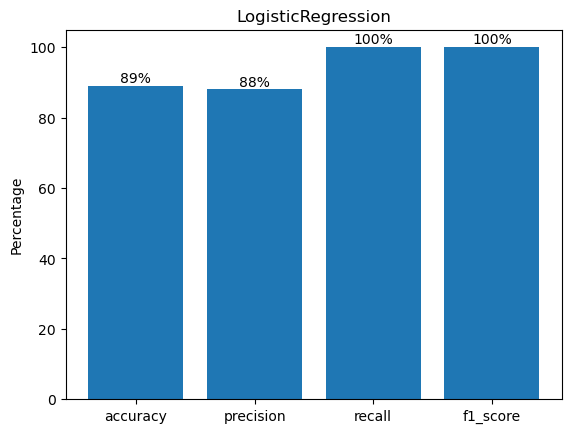

In [143]:
fig , ax = plt.subplots()
ax.bar(log_grid_metrics.keys(),log_grid_metrics.values())
ap = []
[ap.append(i) for i in log_grid_metrics.values()]

for p in range(len(ax.patches)):
   x = ax.patches[p].get_x() + ax.patches[p].get_width()/2
   y = ax.patches[p].get_height() + 1
   ax.annotate(f"{ap[p]}%",(x,y),ha="center")
   ax.set(title="LogisticRegression",ylabel="Percentage")

<Axes: >

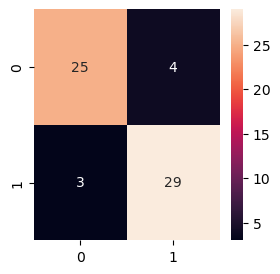

In [134]:
confuse_m = confusion_matrix(y_test,log_gr_preds)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confuse_m,annot=True)

In [136]:
cs_report = classification_report(y_test,log_gr_preds)
print(cs_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

